## MODEL TRAINING

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


##### Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [4]:
X=df.drop(columns=['math_score'],axis=1)

In [5]:
X.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')

In [6]:
y=df['math_score']

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
num_features =X.select_dtypes(exclude='object').columns
cat_features =X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ])

In [11]:
X=preprocessor.fit_transform(X)

In [12]:
X

array([[ 0.19399858,  0.39149181,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.42747598,  1.31326868,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.60515772,  0.58901542,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [13]:
X.shape

(1000, 14)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 14), (200, 14), (800,), (200,))

#### Create an Evaluate Function to give all metrics after model training

In [17]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [18]:
models={
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for name, model in models.items():
    model.fit(X_train,y_train) # Train model

    # Make Predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    ## Evaluate Train and Test dataset
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(f"Model: {name}")
    model_list.append(name)
    r2_list.append(model_test_r2)
    print("Model Performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error :{:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('--------------------------')

    print("model performance for Test set")
    print("- Root Mean Squared Error:{:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


Model: Linear Regression
Model Performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error :4.2667
- R2 Score: 0.8743
--------------------------
model performance for Test set
- Root Mean Squared Error:5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8743
Model: Lasso
Model Performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error :5.2063
- R2 Score: 0.8071
--------------------------
model performance for Test set
- Root Mean Squared Error:6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8071
Model: Ridge
Model Performance for Training set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error :4.2650
- R2 Score: 0.8743
--------------------------
model performance for Test set
- Root Mean Squared Error:5.3936
- Mean Absolute Error: 4.2125
- R2 Score: 0.8743
Model: K-Neighbors Regressor
Model Performance for Training set
- Root Mean Squared Error: 5.5660
- Mean Absolute Error :4.4493
- R2 Score: 0.8626
--------------------------
m

#### Results

In [19]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880451
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.849801
5,Random Forest,0.848390
8,AdaBoost Regressor,0.847746
1,Lasso,0.825320
6,XGBRegressor,0.820924
3,K-Neighbors Regressor,0.776335
4,Decision Tree,0.723800


#### Linear Regression

In [21]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)


Accuracy of the model is 88.04


#### Plot y_pred and  y_test

Text(0, 0.5, 'Predicted')

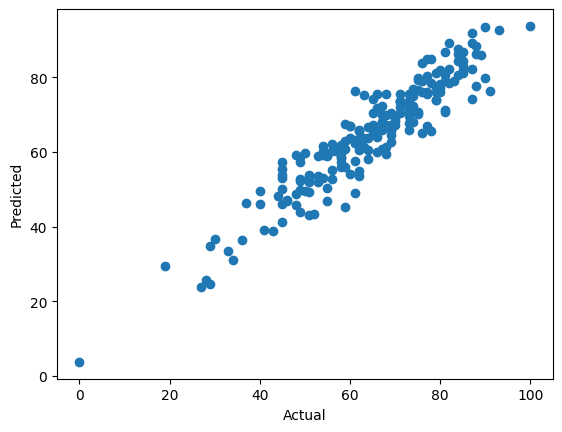

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

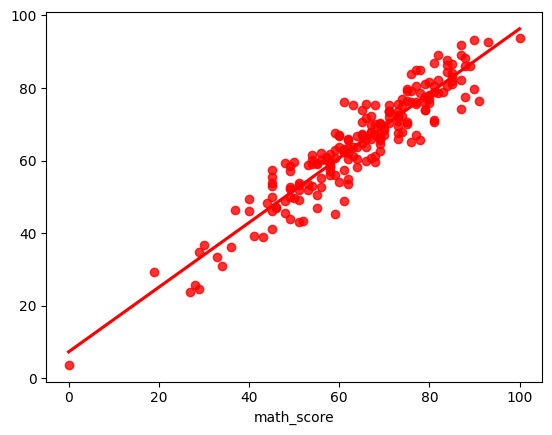

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

#### Difference between Actual and Predicted Values

In [24]:
pred_df=pd.DataFrame({'Atual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Atual Value,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
